# Main 

## Initialisation 

### Import des librairies

In [336]:
import pandas as pd # Pour manipuler des dataframes
import numpy as np # Pour manipuler des arrays
import matplotlib.pyplot as plt # Pour afficher des graphiques
import seaborn as sns # Pour améliorer l'affichage des graphiques

### Import des données

In [337]:
# Paramètres
nbLignes = 5 * (10**6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 200)

# noms fichiers
donneesOctobre2019 = "2019-Oct.csv.gz"
donneesNovembre2019 = "2019-Nov.csv.gz"

# Liste des fichiers
fichiers = [donneesOctobre2019, donneesNovembre2019]

# Chargement des données
nombreDeLignesParFichier = nbLignes // len(fichiers)
df = pd.concat([pd.read_csv(fichier, nrows=nombreDeLignesParFichier) for fichier in fichiers])
print(df.head())

                event_time event_type  product_id          category_id                        category_code     brand    price    user_id                          user_session
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724                                  NaN  shiseido    35.79  541312140  72d76fde-8bb3-4e00-8c23-a032dfed738c
1  2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905  appliances.environment.water_heater      aqua    33.20  554748717  9333dfbd-b87a-4708-9857-6336556b0fcc
2  2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471           furniture.living_room.sofa       NaN   543.10  519107250  566511c2-e2e3-422b-b695-cf8e6e792ca8
3  2019-10-01 00:00:01 UTC       view     1307067  2053013558920217191                   computers.notebook    lenovo   251.74  550050854  7c90fc70-0e80-4590-96f3-13c02c18c713
4  2019-10-01 00:00:04 UTC       view     1004237  2053013555631882655               electronics.smartphone     apple  1

### Préparation des données

In [338]:
# Prépration des données

# On convertit la colonne 'event_time' en datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# On supprime les lignes avec des valeurs manquantes dans les colonnes 'price', 'category_code' et 'user_id'
df.dropna(subset=['price', 'category_code', 'user_id'], inplace=True)

# Si brand est manquant ou égal à "NaN" on le remplace par la valeur "unknown"
df['brand'] = df['brand'].replace(np.nan, 'unknown')

print(df.head(5))

                 event_time event_type  product_id          category_id                        category_code    brand    price    user_id                          user_session
1 2019-10-01 00:00:00+00:00       view     3900821  2053013552326770905  appliances.environment.water_heater     aqua    33.20  554748717  9333dfbd-b87a-4708-9857-6336556b0fcc
2 2019-10-01 00:00:01+00:00       view    17200506  2053013559792632471           furniture.living_room.sofa  unknown   543.10  519107250  566511c2-e2e3-422b-b695-cf8e6e792ca8
3 2019-10-01 00:00:01+00:00       view     1307067  2053013558920217191                   computers.notebook   lenovo   251.74  550050854  7c90fc70-0e80-4590-96f3-13c02c18c713
4 2019-10-01 00:00:04+00:00       view     1004237  2053013555631882655               electronics.smartphone    apple  1081.98  535871217  c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5 2019-10-01 00:00:05+00:00       view     1480613  2053013561092866779                    computers.desktop   pulser   

#### Vérification des valeurs manquantes / nulls / nan

In [339]:
# Afficher le nombre de valeurs manquantes par colonne
print("\nNombre de valeurs Null :\n\n", df.isnull().sum())

# Afficher le nombre de valeurs "NaN" par colonne
print("\nNombre de valeurs Nan :\n\n", df.isna().sum())


Nombre de valeurs Null :

 event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

Nombre de valeurs Nan :

 event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64


## Exploration des données

### Evènements avant achat

### Produit le plus acheté basé sur les achats précédents (TODO)

## Recommandation de Produits

In [340]:
# Le but est de recommander des produits que l'utilisateur serait susceptible d'acheter.

# Filtrage Collaboratif

## Prédiction des ventes

## Modélisations de clients types (Segmentation)

#### Création du dataframe User

In [341]:
# Montant total dépensé par utilisateur
total_spent = df[df['event_type'] == 'purchase'].groupby('user_id')['price'].sum().reset_index()
total_spent.columns = ['user_id', 'total_spent']

# Nombre total d'achats par utilisateur
total_purchases = df[df['event_type'] == 'purchase'].groupby('user_id')['product_id'].count().reset_index()
total_purchases.columns = ['user_id', 'total_purchases']

# Nombre total de vues par utilisateur
total_views = df[df['event_type'] == 'view'].groupby('user_id')['product_id'].count().reset_index()
total_views.columns = ['user_id', 'total_views']

# Nombre de catégories uniques vues par utilisateur
unique_categories = df.groupby('user_id')['category_code'].nunique().reset_index()
unique_categories.columns = ['user_id', 'unique_categories_viewed']

# Nombre de produits uniques vus par utilisateur
unique_products = df.groupby('user_id')['product_id'].nunique().reset_index()
unique_products.columns = ['user_id', 'unique_products_viewed']

# Nombre total de sessions
total_sessions = df.groupby('user_id')['user_session'].nunique().reset_index()
total_sessions.columns = ['user_id', 'total_sessions']

# Achat moyen
average_purchase = df[df['event_type'] == 'purchase'].groupby('user_id')['price'].mean().reset_index()
average_purchase.columns = ['user_id', 'average_purchase']

# Création du DataFrame utilisateur
user_df = total_spent.merge(total_purchases, on='user_id').merge(total_views, on='user_id').merge(unique_categories, on='user_id').merge(unique_products, on='user_id').merge(total_sessions, on='user_id').merge(average_purchase, on='user_id')


#### Création du dataframe Purchases pour traquer le temps moyens entre les achats de chaque client

In [342]:
# Filtrer les évènements d'achat
purchases = df[df['event_type'] == 'purchase']

# Trier les achats par utilisateur et par date
purchases = purchases.sort_values(by=['user_id', 'event_time'])

# Calculer la différence de temps entre les achats successifs
purchases['previous_purchase'] = purchases.groupby('user_id')['event_time'].shift(1)
purchases['time_between_purchases'] = (purchases['event_time'] - purchases['previous_purchase']).dt.total_seconds() / 3600 # en heures


# Calculer la moyenne du temps entre achats par utilisateur
avg_time_between_purchases = purchases.groupby('user_id')['time_between_purchases'].mean().reset_index()
avg_time_between_purchases.columns = ['user_id', 'avg_time_between_purchases']

# Ajouter la moyenne du temps entre achats au DataFrame utilisateur
user_df = user_df.merge(avg_time_between_purchases, on='user_id')

# On remplace les valeurs manquantes par 0 (utilisateurs qui n'ont fait qu'un seul achat)
user_df['avg_time_between_purchases'] = user_df['avg_time_between_purchases'].replace(np.nan, 0) if 'avg_time_between_purchases' in user_df.columns else 0

In [343]:
user_df.head().sort_values(by='avg_time_between_purchases', ascending=False)

,user_id,total_spent,total_purchases,total_views,unique_categories_viewed,unique_products_viewed,total_sessions,average_purchase,avg_time_between_purchases
3,437371552,358.29,2,6,1,2,1,179.145,0.035833
0,356520186,33.45,1,9,1,2,3,33.450,0.000000
1,428293417,1575.50,1,3,1,2,1,1575.500,0.000000
2,433754231,321.73,1,73,1,24,3,321.730,0.000000
4,447698613,282.86,1,2,1,2,1,282.860,0.000000


#### Normalisation des données

In [344]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Normalisation des données
user_df_scaled = scaler.fit_transform(user_df.drop('user_id', axis=1))

# Remettre les données normalisées dans un DataFrame
user_df_scaled = pd.DataFrame(user_df_scaled, columns=user_df.columns[1:])


print(user_df_scaled.head())

   total_spent  total_purchases  total_views  unique_categories_viewed  unique_products_viewed  total_sessions  average_purchase  avg_time_between_purchases
0    -0.535617        -0.320561    -0.127981                 -0.451555               -0.417578        0.256722         -0.892632                   -0.150585
1     1.097520        -0.320561    -0.496970                 -0.451555               -0.417578       -0.638699          3.459628                   -0.150585
2    -0.230308        -0.320561     3.807900                 -0.451555                2.729678        0.256722         -0.078995                   -0.150585
3    -0.191589         0.358676    -0.312476                 -0.451555               -0.417578       -0.638699         -0.481424                   -0.150155
4    -0.271474        -0.320561    -0.558469                 -0.451555               -0.417578       -0.638699         -0.188701                   -0.150585


#### Segmentation avec K-means

##### Estimation du nombre de clusters

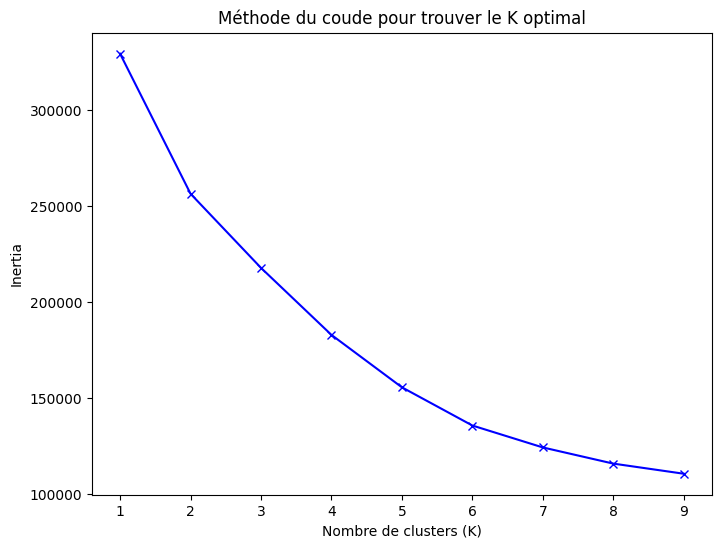

Inertia : [329327.9999999997, 256375.1363518261, 217754.9222606439, 182840.27335953634, 155527.52778959833, 135626.07819361275, 124203.91600293157, 115779.96980869869, 110509.98966673944]


In [345]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Tester plusieurs valeurs de K
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_df_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertia')
plt.title('Méthode du coude pour trouver le K optimal')
plt.show()

print("Inertia :", inertia)

##### Modélisation

In [352]:
optimal_k = 2 # A modifier selon le coude
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
user_df['cluster'] = kmeans.fit_predict(user_df_scaled)


cluster_analysis = user_df.drop(columns=['user_id']).groupby('cluster').mean()
print("\nMoyenne selon les clusters :"); print(cluster_analysis)


Moyenne selon les clusters :
         total_spent  total_purchases  total_views  unique_categories_viewed  unique_products_viewed  total_sessions  average_purchase  avg_time_between_purchases   pca-one   pca-two
cluster                                                                                                                                                                               
0         278.009928         1.247076     7.394491                  1.295835                3.332510        1.925123        226.575888                    1.330726 -0.510583 -0.323859
1        1676.048980         1.916098     8.128964                  1.280382                3.559399        2.327264        985.436358                   62.374199  0.082557  2.029155
2         683.547542         2.525719    46.149565                  3.458982               20.165128        6.671327        244.418897                   17.266793  4.002550 -0.898040


##### Évaluation

Silhouette Score: 0.4623998886507908


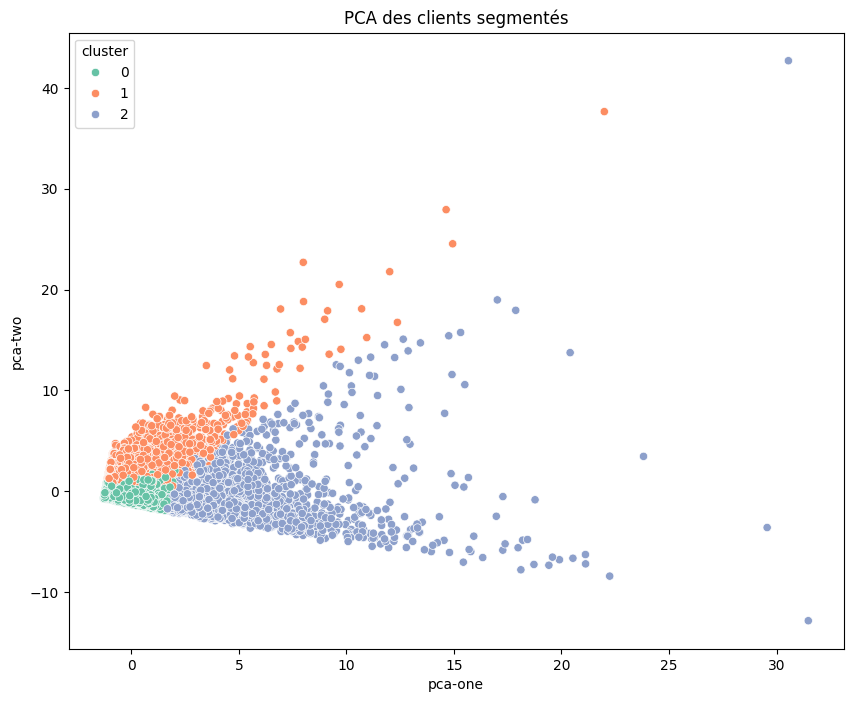

In [353]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(user_df_scaled, user_df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(user_df_scaled)
user_df['pca-one'] = pca_result[:,0]
user_df['pca-two'] = pca_result[:,1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca-one', y='pca-two', hue='cluster', data=user_df, palette='Set2')
plt.title('PCA des clients segmentés')
plt.show()
